In [11]:
def get_offset_curve(alpha, d):
    #---- INPUT ------
    # alpha: curva
    # d: distância entre a curva original e offset
    #-----------------
    
    C_d = diff(alpha, t)
    v_n = vector((- C_d[1], C_d[0])) # vetor normal 
    n = v_n / v_n.norm() # vetor normal unitario
    offset = alpha + d*n # aplica a formula da curva offset
    
    return offset

In [9]:
def plot_multiple_d(alpha, d, k, intervalo, size):   
    figures = []
    curve = figures.append(parametric_plot(alpha, (t, intervalo[0], intervalo[1]), figsize=size, color="blue"))
    for i in range(1,k+1):
        d_k = d*i
        positive_offset = get_offset_curve(alpha, d_k)
        negative_offset = get_offset_curve(alpha, -d_k)
        
        if k < 4:
            figures.append(parametric_plot((positive_offset), (t, intervalo[0], intervalo[1]), figsize=size, color="green", legend_label=f"d ={float(str(d_k).rstrip('0').rstrip('.'))}"))   
            figures.append(parametric_plot((negative_offset), (t, intervalo[0], intervalo[1]), figsize=size, color="red", legend_label=f"d ={float(str(-d_k).rstrip('0').rstrip('.'))}"))
        else:
            figures.append(parametric_plot((positive_offset), (t, intervalo[0], intervalo[1]), figsize=size, color="green"))   
            figures.append(parametric_plot((negative_offset), (t, intervalo[0], intervalo[1]), figsize=size, color="red"))
    return sum(figures)

### Example

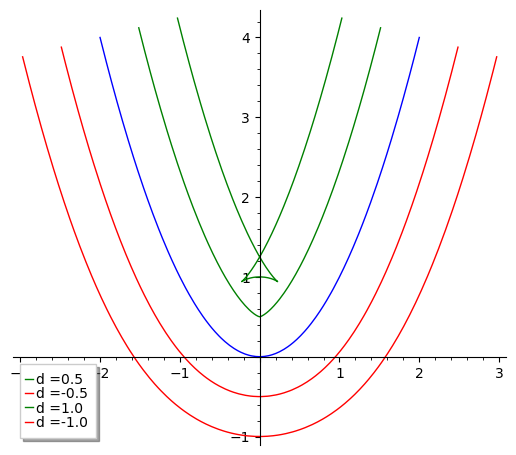

In [12]:
alpha(t) = (t,t^2)
intervalo = [-2,2]
k = 2
d = 0.5

plot_multiple_d(alpha, d, k, intervalo,7)

### Book Exercises

###### 5.15

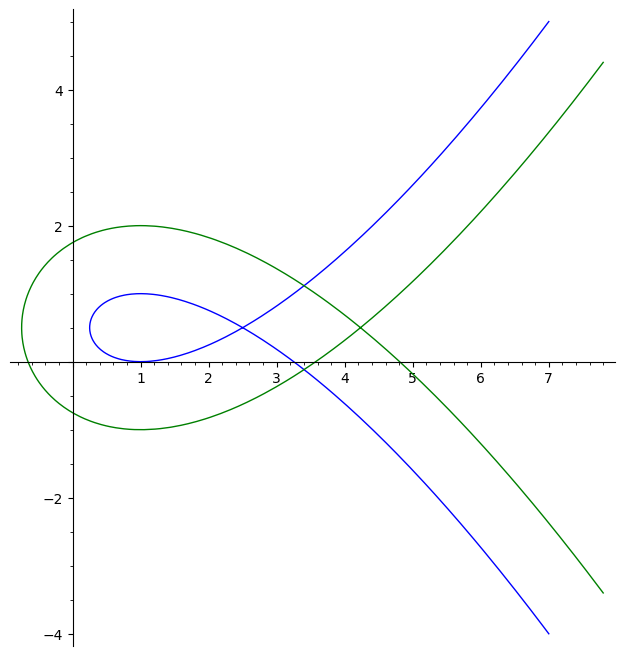

In [13]:
var("t")
alpha(t) = (1-3*t + 3*t^2, 3*t^2 - 2*t^3)
k = 2
d = 1

offset = get_offset_curve(alpha, d)
curve_plot = parametric_plot((alpha), (t, -1,2), figsize=10, color="blue")
offset_plot = parametric_plot((offset), (t, -1,2), figsize=10, color="green")
show(curve_plot + offset_plot)

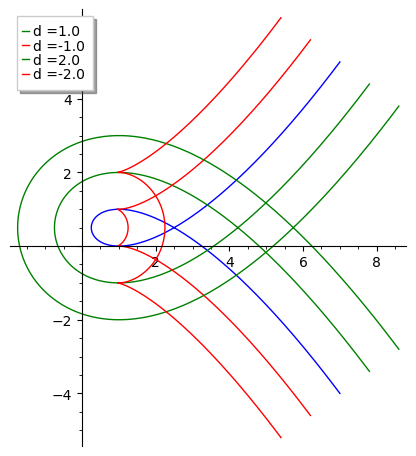

In [14]:
var("t")
C(t) = (1-3*t + 3*t^2, 3*t^2 - 2*t^3)
intervalo = [-1,2]
k = 2
d = 1

plot_multiple_d(C, d, k, intervalo, 7)

### 5.16

#### a)

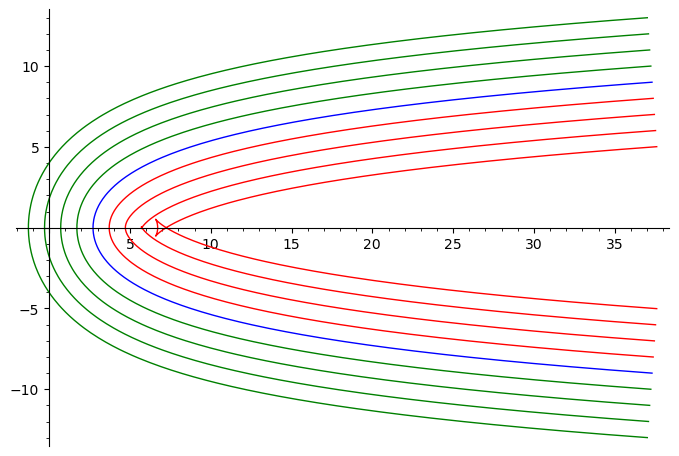

In [15]:
var("t")
alpha(t) = (e*cosh(t/e),t)
intervalo = [-9,9]
k = 4
d = 1

plot_multiple_d(alpha, d, k, intervalo, 7)

#### b)

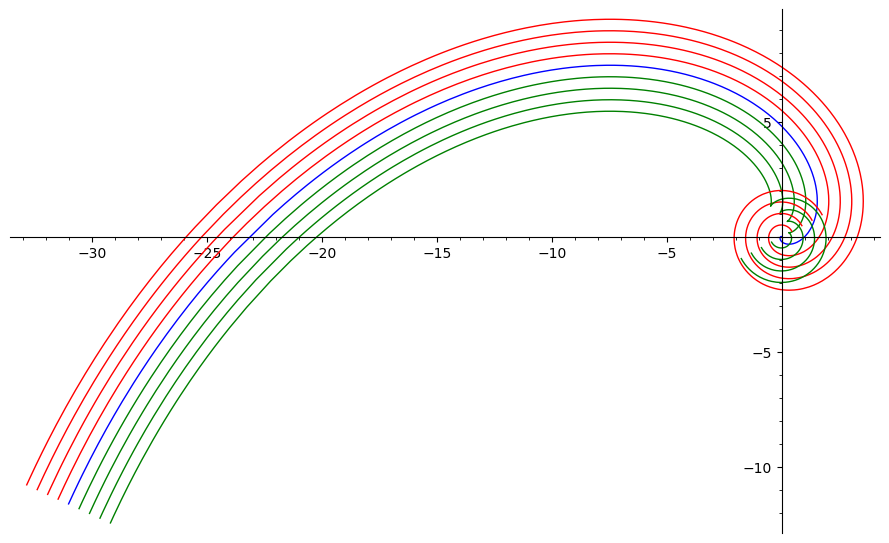

In [16]:
var("t")
b = 1
alpha(t) = (e^(b*t) * cos(t), e^(b*t) * sin(t))
intervalo = [-5,3.5]
k = 4
d = 0.5

plot_multiple_d(alpha, d, k, intervalo, 9)

#### c)

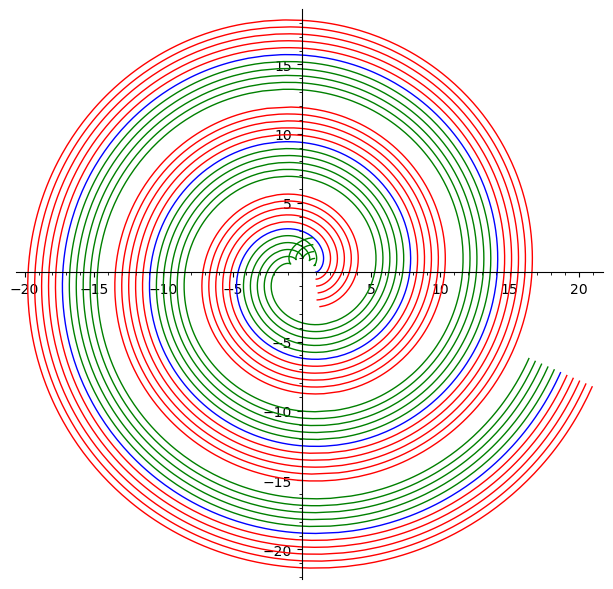

In [17]:
var("t")
alpha(t) = (cos(t) + t*sin(t), sin(t) - t*cos(t))
intervalo = [0,20]
k = 5
d = 0.5

plot_multiple_d(alpha, d, k, intervalo, 9)

#### 5.17

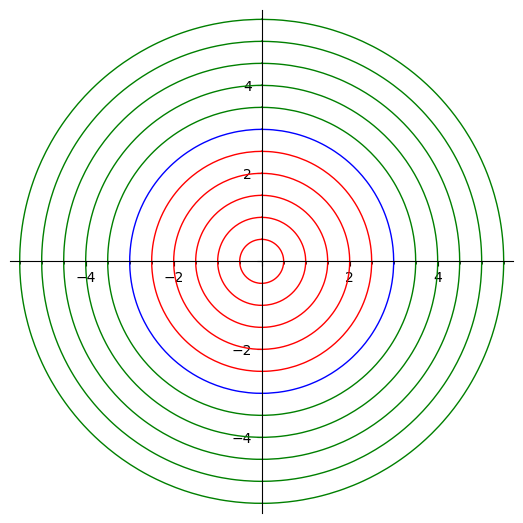

In [18]:
var("t")
r = 3
alpha(t) = (r*sin(t),r*cos(t))
intervalo = [0,2*pi]
k = 5
d = 0.5

plot_multiple_d(alpha, d, k, intervalo, 8)

In [19]:
t,r, d = var("t r d")
assume(r > 0)

alpha(t) = (r*cos(t),r*sin(t))
offset = get_offset_curve(alpha, -d)
offset = vector((offset[0].full_simplify(), offset[1].full_simplify()))
show(offset)

((d + r)*cos(t), (d + r)*sin(t))

### Ball-End Nose Cutter

In [369]:
def ball_end(C, d, t_range, x_range, y_range):
    T = diff(C, t) /diff(C, t).norm() # vetor tangente
    N = diff(T, t)/diff(T, t).norm() # vetor normal
    Od = C + d*N # curva offset
    
    frames = [parametric_plot(Od, (t, t_range[0], t_range[1]), color="black") +
          parametric_plot(C, (t, t_range[0], t_range[1]), color = "blue") +
          plot(N.subs(t=i)*2*d, start = C.subs(t=i) ,  color = "red" ) +
          plot(circle(Od.subs(t=i), d, color = "blue")) for i in srange(t_range[0], t_range[1], 0.5)]
    return animate(frames,figsize=10,xmin=x_range[0], xmax=x_range[1], ymin=y_range[0], ymax=y_range[1])

Animation with 40 frames
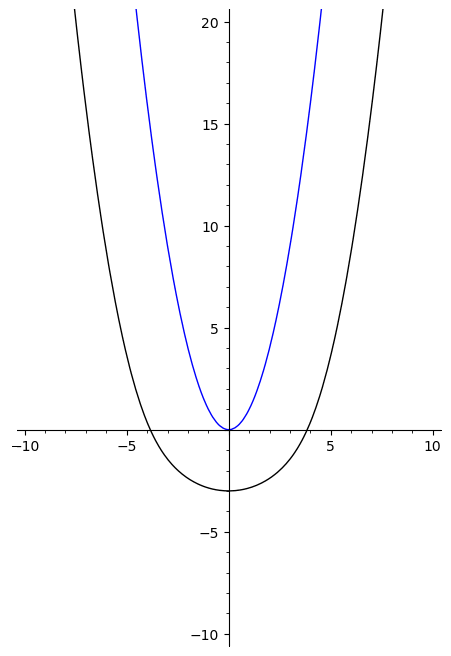

In [370]:
C = vector((t, t^2))
d = -3
t_range = [-10,10]
x_range = [-10,10]
y_range = [-10,20]
ball_end(C, d, t_range, x_range, y_range)

Animation with 13 frames
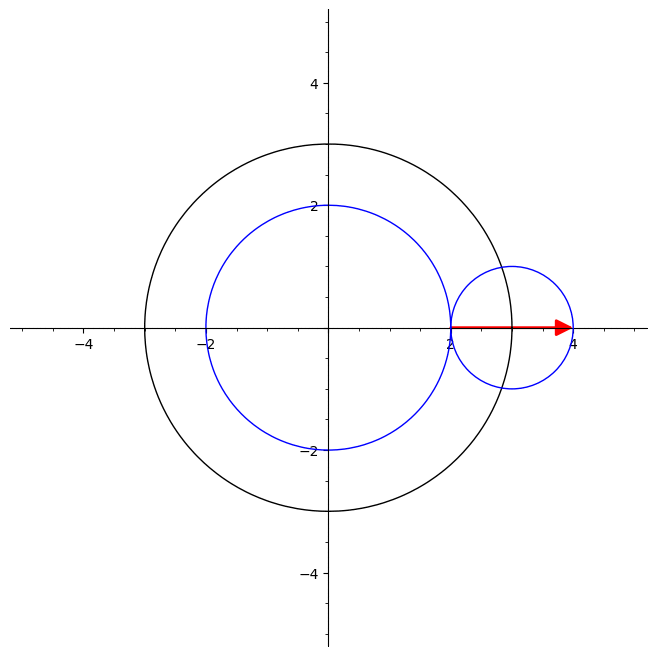

In [373]:
C = vector((2*cos(t),2*sin(t)))
d = -1
t_range = [0, 2*pi]
x_range = [-5,5]
y_range = [-5,5]
ball_end(C, d, t_range, x_range, y_range)

### 3d Curves

In [22]:
def normal_binormal_offsets(C, d, t_range):
    Ta = diff(alpha, t) / norm(diff(alpha, t))
    Na = diff(Ta, t) / norm(diff(Ta, t))
    Ba = Ta.cross_product(Na)
    
    # Principal Parallel Curve
    Alpha_N = alpha + d*Na

    # Binormal Parallel Curve
    Alpha_B = alpha + d*Ba
    
    #Plots 3d
    figures = []
    figures.append(parametric_plot(alpha, (t, -2*pi, 2*pi), color='blue'))
    figures.append(parametric_plot(Alpha_N, (t, -2*pi, 2*pi), color='black'))
    figures.append(parametric_plot(Alpha_B, (t, -2*pi, 2*pi), color='red'))
    
    show(sum(figures),frame=False)

In [23]:
from sage.plot.plot3d.shapes import *
# Curvas Offset: Curva 3d 
t = var("t")
d = -1
t_0 = 0

alpha(t) = ((4/5)*cos(t), 1-sin(t), (-3/5)*cos(t))

Ta = diff(alpha, t) / norm(diff(alpha, t))
Na = diff(Ta, t) / norm(diff(Ta, t))
Ba = Ta.cross_product(Na)


# Principal Parallel Curve
Alpha_N = alpha + d*Na

# Binormal Parallel Curve
Alpha_B = alpha + d*Ba


#Plots 3d
figures = []
figures.append(parametric_plot(alpha, (t, -2*pi, 2*pi), color='blue'))
figures.append(parametric_plot(Alpha_N, (t, -2*pi, 2*pi), color='black'))
figures.append(parametric_plot(Alpha_B, (t, -2*pi, 2*pi), color='red'))

figures.append(plot(d*Na.subs(t=t_0), color='black',start= alpha.subs(t=t_0), thickness = 2)) #vetor tangente
figures.append(plot(d*Ba.subs(t=t_0), color='red',start= alpha.subs(t=t_0), thickness = 2)) #vetor binormal

figures.append(text3d("B(t)", (alpha.subs(t=t_0 + 0.7) + (d/2)*Ba.subs(t=t_0)), rgbcolor=(0,0,0),fontsize=20))
figures.append(text3d("N(t)", (alpha.subs(t=t_0 + 0.7) + (d/2)*Na.subs(t=t_0)), rgbcolor=(0,0,0),fontsize=20))
show(sum(figures),frame=False)

Graphics3d Object

In [24]:
from sage.plot.plot3d.shapes import *
# Curvas Offset: Curva 3d 
t = var("t")
d = -1
t_0 = 6

alpha(t) = (3*cos(2*t), 3*sin(2*t), t)

Ta = diff(alpha, t) / norm(diff(alpha, t))
Na = diff(Ta, t) / norm(diff(Ta, t))
Ba = Ta.cross_product(Na)


# Principal Parallel Curve
Alpha_N = alpha + d*Na

# Binormal Parallel Curve
Alpha_B = alpha + d*Ba


#Plots 3d
figures = []
figures.append(parametric_plot(alpha, (t, 0, 2*pi), color='blue'))
figures.append(parametric_plot(Alpha_N, (t, 0, 2*pi), color='black'))
figures.append(parametric_plot(Alpha_B, (t, 0, 2*pi), color='red'))

figures.append(plot(d*Na.subs(t=t_0), color='black',start= alpha.subs(t=t_0), thickness = 2)) #vetor tangente
figures.append(plot(d*Ba.subs(t=t_0), color='red',start= alpha.subs(t=t_0), thickness = 2)) #vetor binormal

show(sum(figures),frame=False)

Graphics3d Object

#### Example: Involutes

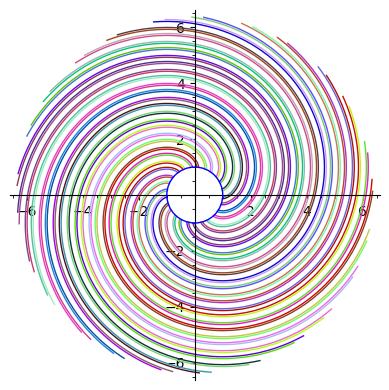

In [107]:
#Involutes of a circle
t = var("t")

def involutes_of_circle(r, a, k, x, y):
    figures = [plot(circle((x,y), r))]
    for i in range(1,k+1):
        r1 = randint(1, 255)
        g1 = randint(1, 255)
        b1 = randint(1, 255)
        X(t) = r*cos(t + a*i) + t*sin(t + a*i) + x
        Y(t) = r*sin(t + a*i) - t*cos(t + a*i) + y
        C(t) = (X(t) , Y(t))
        figures.append(parametric_plot(C(t),(t, 0, 2*pi), rgbcolor=(1- r1/255, 1-g1/255, 1- b1/255)))
    plot_complet  = sum(figures)   
    return plot_complet

r = 1
a = 0.5
k = 50

show(involutes_of_circle(r, a, k, 0, 0))

### Implicit Plots

In [337]:
def plot_implicit_offset(C, d, k):  
    grad_C = vector((diff(C,x), diff(C,y)))
    n = vector([-grad_C[1], grad_C[0]])/norm(grad_C)
    C_offset(x,y) = C(x,y) + d*(grad_C[0]*n[0] + grad_C[1]*n[1])
    
    figures = []
    figures.append(implicit_plot(C, (x, -2, 2), (y, -2, 2), color="blue"))
    for i in range(1,k):
        r1 = randint(1, 255)
        g1 = randint(1, 255)
        b1 = randint(1, 255)
        d_k = d*i
        figures.append(implicit_plot(C_offset==d_k, (x, -3, 3), (y, -3, 3),color=(1- r1/255, 1-g1/255, 1- b1/255)))
    return sum(figures)

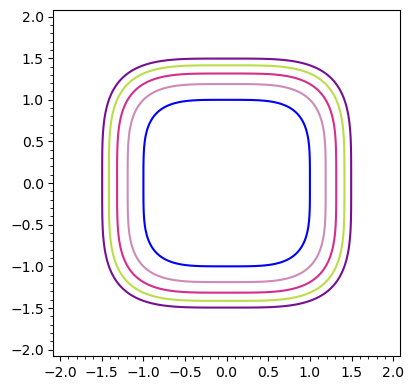

In [336]:
C(x,y) = x^4 + y^4 - 1
plot_implicit_offset(C, 1, 5)

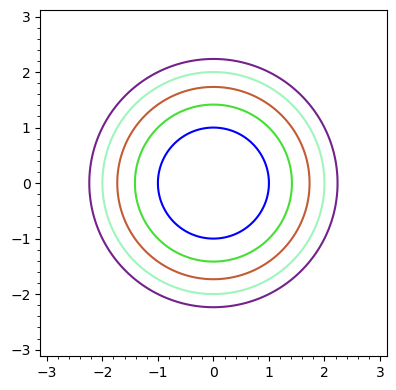

In [338]:
C(x,y) = x^2 + y^2 - 1
plot_implicit_offset(C, 1, 5)

In [322]:
C(x,y) = x^2 + y^2 - 1
grad_C = vector((diff(C,x), diff(C,y)))
n = vector([-grad_C[1], grad_C[0]])/norm(grad_C)
C_offset(x,y) = C(x,y) + d*(grad_C[0]*n[0] + grad_C[1]*n[1])
show(norm(grad_C))

(x, y) |--> 2*sqrt(abs(x)^2 + abs(y)^2)